# Chord plot

Small tutorial on how to use helper functions from neuroginius to make
nice chord plots.

In [1]:
import sys
sys.path.append("..") # Add neuroginius to PYTHONPATH

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

from neuroginius.synthetic_data.generation import generate_topology_net_interaction
from neuroginius.atlas import Atlas
from neuroginius.iterables import unique
from neuroginius.plotting import make_links, create_chord, plot_matrix

ATLAS = "msdl"
atlas = Atlas.from_name(ATLAS)
labels = tuple(unique(atlas.labels))
rng = np.random.default_rng(1999)

We start by creating synthetic connectivity data :

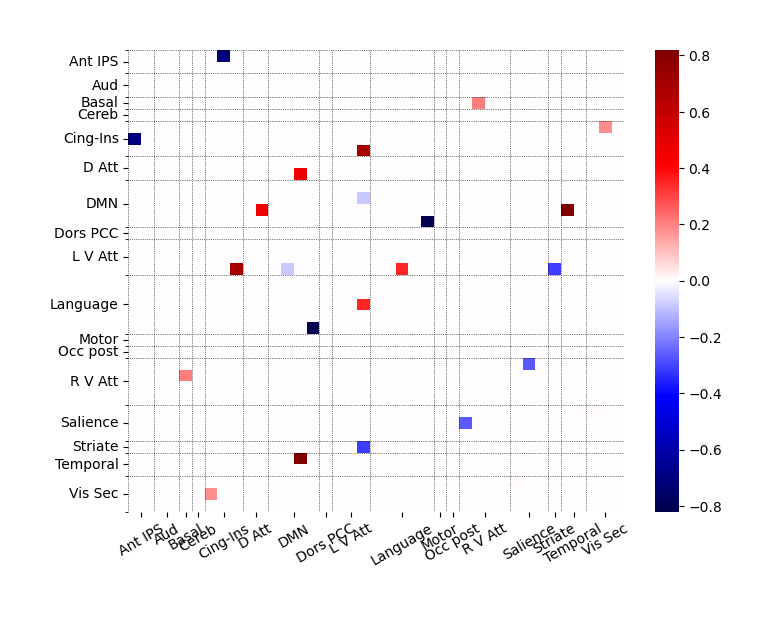

In [7]:
topology = np.zeros((len(labels), len(labels)))

for roi_pair in product(labels, labels):

    block = generate_topology_net_interaction(roi_pair, labels) * 2

    # Sparsify and project to [-1, 1]
    topology += rng.binomial(1, 0.005) * rng.uniform(-1, 1) * block

plot_matrix(topology, atlas)
plt.show()

In order to make a chord plot, we need to make a 
list of links. The helper function `make_links` takes a df as 
an input of shape (n_labels, n_labels) with the values to be plotted,
and generates the links of approriate size and color in the proper pycirclize format.

In [4]:
matrix_df = pd.DataFrame(topology, index=labels, columns=labels)
links = make_links(matrix_df)

Med DMN D ACC 0.8697976199451176 8.697976199451176
Motor Cing -0.8395767159270779 8.395767159270779
R DLPFC R Ant IPS 0.2974588681751047 2.974588681751047
R Par R Ant IPS -0.35576153939121724 3.5576153939121724
R Post Temp L Ant IPS 0.21403855380396042 2.140385538039604
L DLPFC R Pars Op -0.37432901541234687 3.7432901541234687
L Front pol D ACC 0.3299554695552265 3.2995546955522648
R LOC Dors PCC 0.9130921258015388 9.130921258015388
D ACC Med DMN 0.8697976199451176 8.697976199451176
D ACC L Front pol 0.3299554695552265 3.2995546955522648
R Pars Op L DLPFC -0.37432901541234687 3.7432901541234687
Cereb L Ins 0.12391960297309845 1.2391960297309845
Dors PCC R LOC 0.9130921258015388 9.130921258015388
L Ins Cereb 0.12391960297309845 1.2391960297309845
Cing Motor -0.8395767159270779 8.395767159270779
L Ant IPS R Post Temp 0.21403855380396042 2.140385538039604
R Ant IPS R DLPFC 0.2974588681751047 2.974588681751047
R Ant IPS R Par -0.35576153939121724 3.5576153939121724


We finally call `create_chord`, which iterates through labels and links and returns the figure.

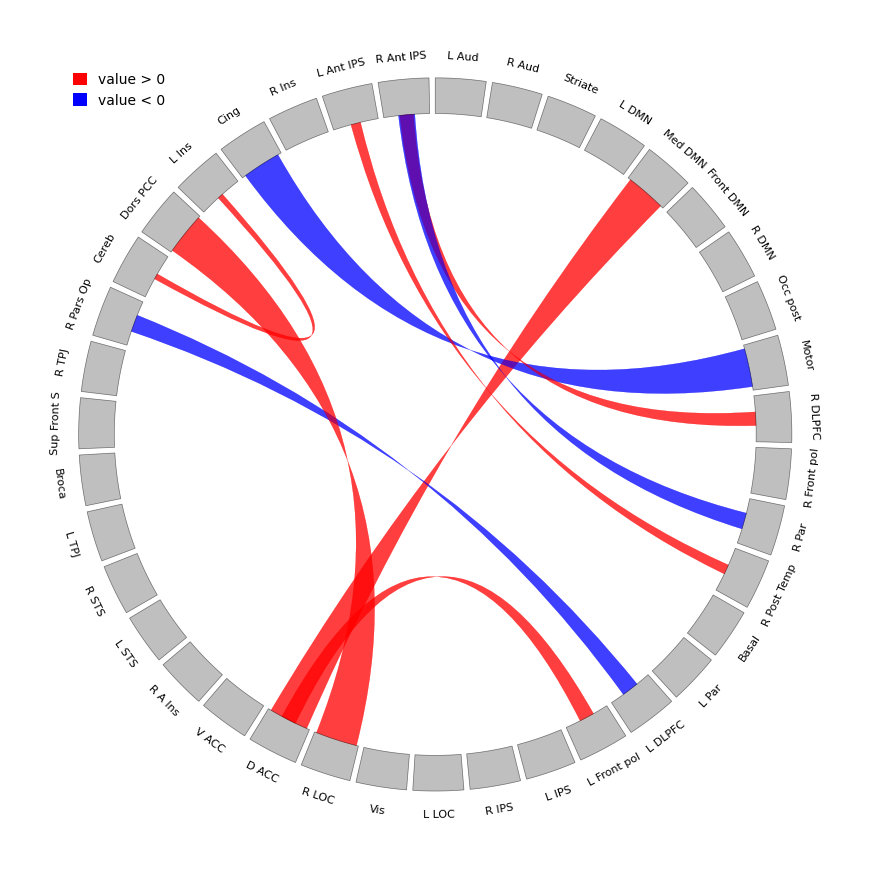

In [5]:
from matplotlib import patches

create_chord(labels, links, size=8)
pos_patch = patches.Patch(color='red', label='value > 0')
neg_patch = patches.Patch(color='blue', label='value < 0')
plt.legend(handles=[pos_patch, neg_patch])
plt.show()